# Flight Solutions


# Goals
* ML analysis model that decodes a decade of flight data to predict and manage airline delay.
* Optimize operations, enhance passenger experience.

## Imports

In [1]:
# importing the necessary libraries to run the code
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
import wrangle
# from wrangle import 

import explore as e
# # from explore import 
import model as m
# from modeling import 
# from modeling import

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquire data from https://data.world/food/wine-quality
* Octber 2009 and July 2011 are missing the entire months of data.
* Each observation represent an average delay for that day.
* We are measuring the average delays for each day for the last ten years

## Prepare

* Checked for nulls in the data (there were none)
* Checked fi]or duplicates (there were none)
* Filter flight data to only rows with delays.
* Filter the data to to four airlines: Delta, American, Southwest, and United Airlines.
* Filter the data to include only the top 15 Class B Airlines.
* Split data into train, validate and test.
* Outliers have not been removed for this iteration of the project.

In [2]:
# used my wrangle function that acquires, preps and cleans the data
flights = wrangle.pull_airline_data('UA')
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

# splits data train, validate, test
train, validate, test = m.train_test_split(df, '2W')
train_fl, validate_fl, test_fl = m.train_fl_test_fl_split(flights, '2W')

# Data At a Glance

In [3]:
train_fl.head()

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,UA,26,LAX,JFK,0.0,0.0,0.0,0.0,45.0,45.0
2009-01-01,UA,43,DEN,HNL,0.0,0.0,0.0,0.0,162.0,162.0
2009-01-01,UA,71,DEN,OGG,130.0,0.0,0.0,0.0,0.0,130.0
2009-01-01,UA,73,SFO,HNL,20.0,0.0,0.0,0.0,0.0,20.0
2009-01-01,UA,95,EWR,SFO,41.0,0.0,8.0,0.0,0.0,49.0


In [4]:
# display a snapshot of summary statistics
train.describe()


,average_delay
count,209.000000
mean,57.333545
std,8.007163
min,43.985268
25%,51.858733
50%,55.855312
75%,61.617909
max,101.509765


# Explore

### Is the mean at each airport equal or is there something causing  a difference?


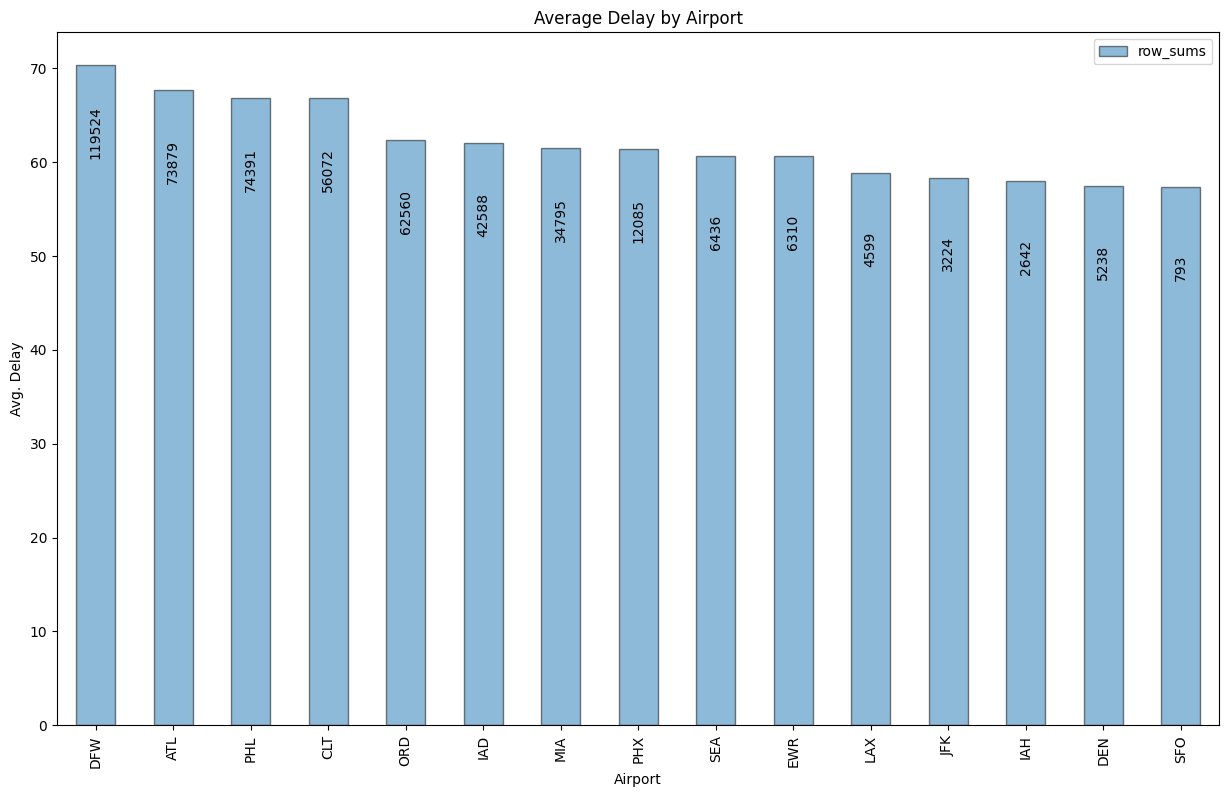

In [5]:
m.means_by_airport(flights, train_fl)

### Takeaways:

* DFW has the highest average of delay and the most flights
* The order of means seems to reflect the flights as well, compared to other airports.
* 

# Stats Testing

## Hypothesis:

H 0 : The average delay in each airport are all the same.

H a : The average delay in each airport are not all the same.

In [6]:
f, p = m.anova_airport_test(flights)
f, p

(165.26107298063963, 0.0)

### *Are current months correlated with the proceeding month?


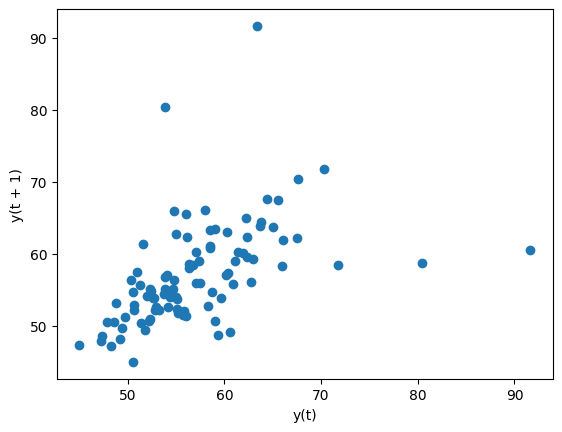

In [7]:
m.plot_best_lag_plot(train, 'm', 1)

### Takeaways:
* As the
* Wines tare 237
* Red 

# Stats Testing

## Hypothesis:

H 0 : There is no linear correlation between monthly delay and monthly lag delay.

H a : There is a linear correlation between monthly delay and monthly lag delay.

## Pearson's R-test¶

In [8]:

α = 0.05

corr, p = m.pearsons_r_test(train, 'm')
corr, p

(0.4993473061801668, 2.5894146307773806e-07)

## P-value less than alpha?

In [9]:
p < α

True

### We can reject the null hypothesis.


## * Is the mean of each month equal or is there something causing a difference?

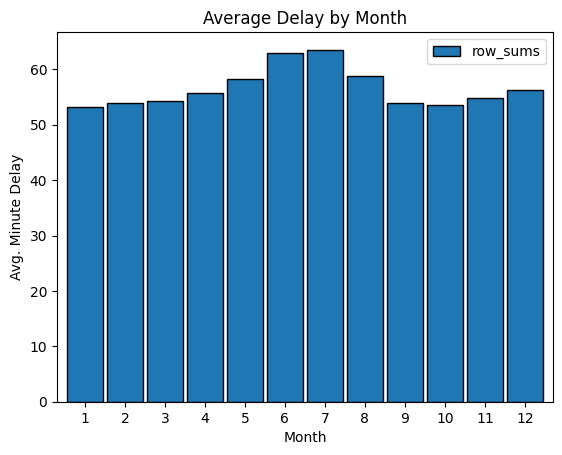

In [10]:
m.plot_month_delay(train_fl)

### Takeaways:

* Summertime has the highest averages for the year
* The aveage delay dips during the colder months

# Stats Testing
## Hypothesis:
H
0
: The average pH level in red and white wines is the same.

H
a
: The average pH in is greater in red wines.
## Anova Test

In [11]:
# getting theire data
f, p = m.anova_month_test(train)

f,p


(6.679947850802641, 1.7884429933248245e-09)

### We can reject the null hypothesis.


### *Are current fort nights correlated with the proceeding fort nights?


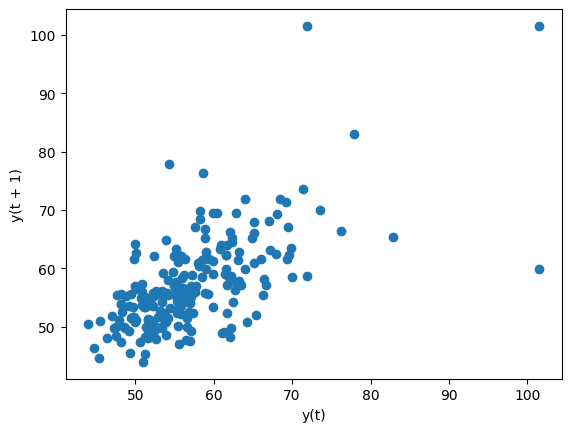

In [13]:
m.plot_best_lag_plot(train, '2w', 1)

### Takeaways
* Chlorides 
* As t
* There

# Stats Testing

## Hypothesis:

H 0 : There is no linear correlation between monthly delay and monthly lag delay.

H a : There is a linear correlation between monthly delay and monthly lag delay.

## Pearson's R-test¶

In [14]:
corr, p = m.pearsons_r_test(train, '2w')
corr, p

(0.6387125197366863, 3.0819800141713925e-25)

#  Analysis
* As seen a
* For insta
* The mean
* However 



---